# Single Variable Polynomial Regression

In [1]:
%pip install numpy pandas matplotlib

Note: you may need to restart the kernel to use updated packages.


## Install Dependencies

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Import Dataset

In [3]:
df = pd.read_csv('../SingleVariablePolynomialRegression/data/Data.csv')

In [4]:
df.head()

,X,Y
0,0.987988,5.098368
1,0.719720,2.516654
2,-0.403403,0.337961
3,0.107107,0.737320
4,0.345345,-0.780955


### Note: No NAN Values

In [5]:
df.isna().sum()

X    0
Y    0
dtype: int64

## Normalize the feature X

In [6]:
df['X'] = (df['X']-np.mean(df['X']))/np.std(df['X'])

In [7]:
df.head()

,X,Y
0,1.709535,5.098368
1,1.245345,2.516654
2,-0.698017,0.337961
3,0.185330,0.737320
4,0.597558,-0.780955


## Generate Random Test and Train Splits

In [8]:
seed = 420
train_fraction = 0.8
train = df.sample(frac=train_fraction, random_state=seed)
test = df.drop(train.index)

In [9]:
train.info

<bound method DataFrame.info of             X         Y
715 -1.259202  0.035008
353  1.591755  2.834778
507  0.105655 -1.238693
713  0.943968  0.730347
553 -0.500563  0.381970
..        ...       ...
252 -1.435871  0.610148
327  0.012124  0.765786
115 -0.396640 -0.704895
174 -0.025981  2.100271
701 -1.629861 -0.873611

[800 rows x 2 columns]>

In [10]:
test.info

<bound method DataFrame.info of             X         Y
3    0.185330  0.737320
8   -0.670304 -0.566798
9    0.715337  2.219073
10  -0.012124  0.341446
28   0.902399  1.116080
..        ...       ...
975  1.674894  5.692382
983  0.348142 -0.517849
994  0.912791  1.611825
995  1.162207  3.079356
996 -1.065212  0.027487

[200 rows x 2 columns]>

## Polynomial Regression Model

In [134]:
class PolynomialRegressionModel:
    def __init__(self, degree):
        """
        Polynomial Regression Model for some particular degree.
        """
        self.errors = {}
        self.deg = degree
        self.weights = np.random.rand(1, degree+1)

    def calculate_loss(self, input, target):
        # print('inside self.calculate_loss()')
        assert type(input) == float and type(target) == float, "Types are not matching. Check!"
        result = []
        prediction = self.predict([input])
        # print('predicted:')
        # print(prediction)
        # print('expected')
        # print(target)
        for i in range(self.deg+1):
            result.append(
                (input**i)*(prediction-target)
            )
        # print('loss: ')
        # print(result)
        return np.array(result).reshape(self.weights.shape)

    def fit(self, X_train, y_train, lr=0.01, epochs=500, batch_size=20):
        """
        Fit the polynomial regression model using Batch Gradient Descent.

        Parameters:
        X_train: Input Feature variable (only one!)
        y_train: Target Variable
        lr: Learning Rate for Gradient Descent
        epochs: No of Epochs to train

        Returns:
        NA
        """
        print('Starting Training.....')
        for epoch in range(epochs):
            count = 0
            loss = np.zeros_like(self.weights)
            for sample in zip(X_train, y_train):
                input = sample[0]
                target = sample[1]
                # print(input, target)
                if count%batch_size == 0:
                    loss /= batch_size
                    self.weights *= 0.995
                    self.weights -= lr*loss
                    loss = np.zeros_like(self.weights)
                else:
                    loss += self.calculate_loss(input, target)
            
                count+=1
                if epoch == 0:
                    # print(epoch*X_train.shape[0]+count)
                    self.errors[count] = self.calculate_error(X_train, y_train)
            if epoch%(epochs/10) == 0:
                print(f"epoch: {epoch}")
                print(f"Error: {self.calculate_error(X_train, y_train)}")

        return

    def calculate_error(self, X_test, y_test):
        """
        Find the error of the model on some data.

        Parameters:
        X_test: The sample Input Feature.
        y_test: The sample Target Feature.

        Returns:
        A float value that is the MSE b/w the predicted outputs and the target outputs.
        """
        predictions = self.predict(X_test)
        mse = np.mean(
            (predictions-y_test)**2
        )
        return mse

    def predict(self, X_test):
        """
        Make Predictions using the trained model.

        Parameters:
        X_test: The sample Input Features.

        Returns:
        A numpy Array with the predicted target variable value for each of the samples having
        same dimensions as X_test.
        """
        result = [] 
        for sample in X_test:
            assert type(sample) == float, "Variable doesn't have the required type!"
            arr = np.array([sample**i for i in range(self.deg+1)]).reshape(1, self.deg+1)
            result.append(arr.dot(self.weights.T)[0][0])
            
        return np.array(result)

## Skip

In [135]:
model = PolynomialRegressionModel(3)
model.fit(train['X'], train['Y'], lr=0.01, epochs=1000)

Starting Training.....
epoch: 0
Error: 1.2661752859619195
epoch: 100
Error: 1.1038973895334854
epoch: 200
Error: 1.1038973895327169
epoch: 300
Error: 1.1038973895327169
epoch: 400
Error: 1.1038973895327169
epoch: 500
Error: 1.1038973895327169
epoch: 600
Error: 1.1038973895327169
epoch: 700
Error: 1.1038973895327169
epoch: 800
Error: 1.1038973895327169
epoch: 900
Error: 1.1038973895327169


In [136]:
x = model.errors.keys()
x
y = []
for i in x:
    y.append(model.errors[i])
x = np.array(list(x))
y = np.array(y)


In [137]:
y

array([2.31308229, 2.31308229, 2.31308229, 2.31308229, 2.31308229,
       2.31308229, 2.31308229, 2.31308229, 2.31308229, 2.31308229,
       2.31308229, 2.31308229, 2.31308229, 2.31308229, 2.31308229,
       2.31308229, 2.31308229, 2.31308229, 2.31308229, 2.31308229,
       2.18283712, 2.18283712, 2.18283712, 2.18283712, 2.18283712,
       2.18283712, 2.18283712, 2.18283712, 2.18283712, 2.18283712,
       2.18283712, 2.18283712, 2.18283712, 2.18283712, 2.18283712,
       2.18283712, 2.18283712, 2.18283712, 2.18283712, 2.18283712,
       2.12405982, 2.12405982, 2.12405982, 2.12405982, 2.12405982,
       2.12405982, 2.12405982, 2.12405982, 2.12405982, 2.12405982,
       2.12405982, 2.12405982, 2.12405982, 2.12405982, 2.12405982,
       2.12405982, 2.12405982, 2.12405982, 2.12405982, 2.12405982,
       2.06088399, 2.06088399, 2.06088399, 2.06088399, 2.06088399,
       2.06088399, 2.06088399, 2.06088399, 2.06088399, 2.06088399,
       2.06088399, 2.06088399, 2.06088399, 2.06088399, 2.06088

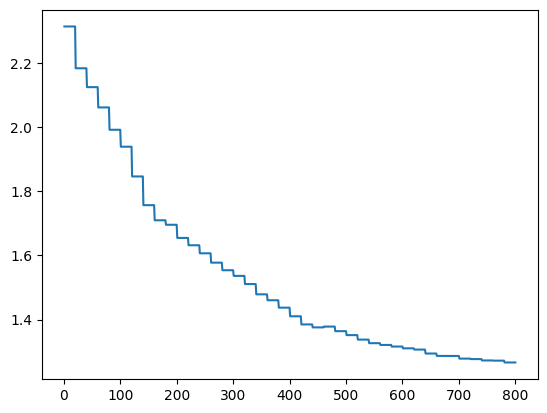

In [139]:
plt.plot(x, y)
plt.show()

In [126]:
y_pred = model.predict(test['X'])
y_pred

array([ 1.46568795e-01,  1.59482557e-03,  3.96679279e-01,  1.11967894e-01,
        5.74978170e-01, -1.13894111e-02, -5.87396191e-02,  1.09876932e+00,
        2.16958488e+00,  1.53482830e-02, -1.84048619e-01,  5.01942922e-01,
       -8.49349683e-02,  6.63050602e-02,  1.12440976e-01,  1.55469768e+00,
        5.37176330e-02,  1.38425708e+00,  6.96916098e-01, -1.54380075e-01,
        9.86068363e-01,  8.14827575e-03,  1.29802169e-01, -9.50299359e-01,
        7.31861152e-02,  2.04279969e+00,  1.08577975e+00,  7.98496818e-02,
        9.94339864e-02,  1.54624610e+00,  6.27210436e-01,  9.27457926e-01,
        8.68146093e-02,  4.43381987e-01, -1.52018981e-01,  3.47339698e-01,
        2.08445055e+00, -3.29479620e-01, -8.84920626e-01,  1.83456167e-01,
       -5.22737854e-02,  7.45701782e-02,  1.28568547e-01, -2.07967715e-01,
        5.37378669e-01,  4.64064626e-02,  5.19394815e-01,  3.59234138e-02,
        7.89951800e-02,  1.26760099e-01,  4.35531075e-02,  5.22948742e-01,
        3.80401078e-01,  

In [127]:
test['Y']

3      0.737320
8     -0.566798
9      2.219073
10     0.341446
28     1.116080
         ...   
975    5.692382
983   -0.517849
994    1.611825
995    3.079356
996    0.027487
Name: Y, Length: 200, dtype: float64

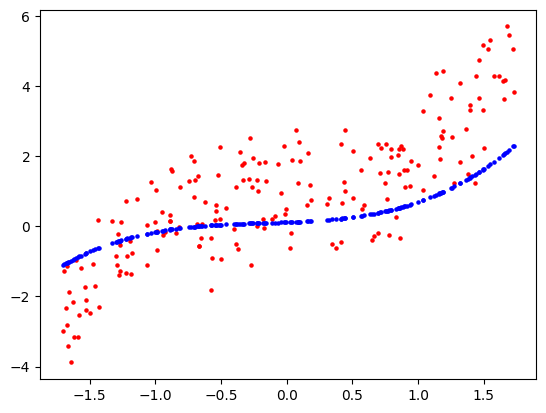

In [128]:
plt.scatter(test['X'], test['Y'], s=5, c='red')
plt.scatter(test['X'], y_pred, s=5, c='blue')